In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import model_selection
%matplotlib inline

In [2]:
df_red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")

In [3]:
df_red.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [4]:
mapping = { 
    3:1,
    4:2,
    5:3,
    6:4,
    7:5,
    8:6
}

In [5]:
df_red.loc[:,'quality'] = df_red.quality.map(mapping)

In [6]:
df_red.quality.unique()

array([3, 4, 5, 2, 6, 1])

In [7]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,3
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,3
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,3
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,4
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,3


#### Why cross validation?

Actually ans is to train pretty well avoiding ovefitting.

### Simple Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(df_red.iloc[:,:-1],df_red['quality'])

In [10]:
print(y_train.shape)

(1199,)


In [11]:
from sklearn import tree
from sklearn import metrics

In [12]:
train_acc =[]
test_acc=[]
for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth=depth,random_state=42)
    clf.fit(X_train,y_train)
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    
    train_accuracy = metrics.accuracy_score(y_train,train_pred)
    test_accuracy = metrics.accuracy_score(y_test,test_pred)
    
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

In [24]:
test_acc

[0.5775,
 0.5775,
 0.585,
 0.6125,
 0.6175,
 0.6475,
 0.645,
 0.6425,
 0.62,
 0.62,
 0.64,
 0.63,
 0.585,
 0.5925,
 0.5975,
 0.595,
 0.6075,
 0.6075,
 0.6075,
 0.6075,
 0.6075,
 0.6075,
 0.6075,
 0.6075]

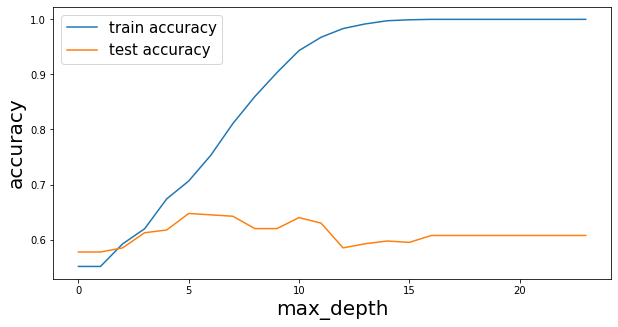

In [13]:
plt.figure(figsize=(10,5))

plt.plot(train_acc,label="train accuracy")

plt.plot(test_acc,label="test accuracy")
plt.xticks(range(0,25,5))
plt.legend(loc="upper left",prop={'size':15})
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

It may not seems to be overfit. But overfit also refers test loss to increase when train loss is improving

### Kfold cross validation


In [14]:
df_red['kfold'] = -1

In [15]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,3,-1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,3,-1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,3,-1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,4,-1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,3,-1


In [16]:
#shuffling
df_red=df_red.sample(frac = 1).reset_index(drop=True)

In [17]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,8.2,0.340,0.38,2.50,0.080,12.0,57.0,0.99780,3.30,0.47,9.0,4,-1
1,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,1,-1
2,5.6,0.540,0.04,1.70,0.049,5.0,13.0,0.99420,3.72,0.58,11.4,3,-1
3,8.5,0.460,0.59,1.40,0.414,16.0,45.0,0.99702,3.03,1.34,9.2,3,-1
4,8.1,0.780,0.10,3.30,0.090,4.0,13.0,0.99855,3.36,0.49,9.5,3,-1


In [34]:
kf= model_selection.KFold(n_splits=5)
train_acc =[]
test_acc=[]
X = df_red.iloc[:,:-1]
y = df_red['quality']
for i,(train_idx,test_idx) in enumerate(kf.split(X=X,y=y)):
    X_train,X_test = X.iloc[train_idx],X.iloc[test_idx]
    y_train,y_test = y.iloc[train_idx],y.iloc[test_idx]
    print(y_test.tolist())
    clf = tree.DecisionTreeClassifier(max_depth=6,random_state=42)
    clf.fit(X_train,y_train)
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)
    print(test_pred)
    train_accuracy = metrics.accuracy_score(y_train,train_pred)
    test_accuracy = metrics.accuracy_score(y_test,test_pred)
    
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)    

[4, 1, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4, 5, 3, 4, 3, 4, 5, 4, 3, 4, 5, 3, 3, 3, 3, 4, 4, 3, 4, 3, 4, 5, 3, 3, 4, 5, 3, 4, 4, 3, 4, 3, 3, 5, 4, 3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 4, 4, 3, 4, 3, 4, 1, 4, 3, 4, 2, 5, 4, 4, 5, 3, 4, 4, 5, 3, 3, 3, 3, 4, 3, 5, 4, 3, 4, 4, 4, 5, 4, 3, 5, 2, 4, 4, 3, 3, 3, 2, 4, 4, 3, 3, 4, 3, 4, 4, 4, 5, 3, 5, 4, 4, 4, 5, 3, 3, 4, 4, 6, 4, 3, 5, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 4, 3, 3, 4, 4, 5, 4, 4, 4, 3, 3, 3, 3, 3, 6, 3, 3, 4, 1, 3, 4, 3, 4, 3, 4, 3, 5, 3, 3, 3, 3, 3, 2, 3, 3, 3, 4, 4, 3, 3, 5, 4, 3, 5, 4, 4, 3, 4, 3, 3, 4, 3, 2, 3, 3, 5, 4, 3, 4, 3, 3, 2, 3, 4, 5, 3, 4, 4, 3, 3, 4, 4, 3, 3, 3, 5, 4, 5, 4, 5, 4, 4, 3, 3, 5, 3, 2, 4, 5, 3, 5, 4, 5, 4, 5, 1, 3, 3, 3, 3, 4, 2, 5, 3, 5, 4, 4, 3, 3, 4, 3, 4, 3, 3, 5, 3, 3, 5, 5, 4, 5, 4, 2, 4, 4, 3, 3, 3, 4, 4, 4, 2, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 5, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 3, 4, 3, 5, 4, 3, 4, 3, 5, 3, 3, 5, 4, 2, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3]
[4 1 3 3 3 3 3 4 4 3 3 4 5 3 4 3 4 5 4 

In [28]:
train_acc

[1.0, 1.0, 1.0, 1.0, 1.0]

In [20]:
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,8.2,0.340,0.38,2.50,0.080,12.0,57.0,0.99780,3.30,0.47,9.0,4,0
1,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,1,0
2,5.6,0.540,0.04,1.70,0.049,5.0,13.0,0.99420,3.72,0.58,11.4,3,0
3,8.5,0.460,0.59,1.40,0.414,16.0,45.0,0.99702,3.03,1.34,9.2,3,0
4,8.1,0.780,0.10,3.30,0.090,4.0,13.0,0.99855,3.36,0.49,9.5,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,9.0,0.820,0.14,2.60,0.089,9.0,23.0,0.99840,3.39,0.63,9.8,3,4
1595,7.5,0.650,0.18,7.00,0.088,27.0,94.0,0.99915,3.38,0.77,9.4,3,4
1596,10.4,0.410,0.55,3.20,0.076,22.0,54.0,0.99960,3.15,0.89,9.9,4,4
1597,6.6,0.660,0.00,3.00,0.115,21.0,31.0,0.99629,3.45,0.63,10.3,3,4
